## Import the necessary software libraries:

In [1]:
# pip install gym==0.21.0
# install torchvision

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [3]:
env = Maze()

In [4]:
# pip install pyglet==1.5.27

2023-03-20 22:37:16.088 python[4320:99777] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f99f1dba570>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:16.089 python[4320:99777] Warning: Expected min height of view: (<NSButton: 0x7f99f1dba960>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:16.090 python[4320:99777] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f99f1dbeb00>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:16.091 python[4320:99777] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f99f1dcc3d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


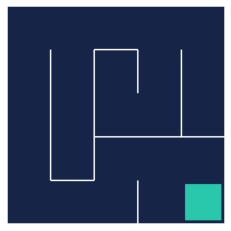

In [5]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [6]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [7]:
policy_probs = np.full((5, 5, 4), 0.25)

In [8]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [9]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

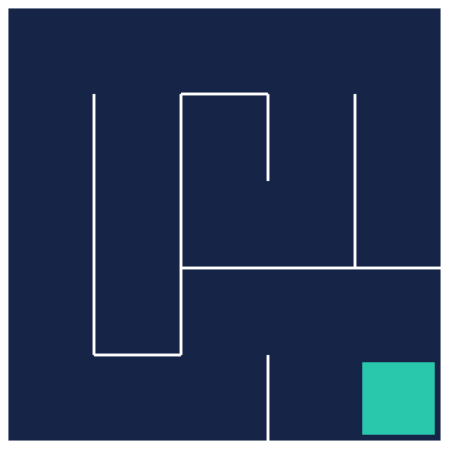

In [10]:
test_agent(env, policy, episodes=1)

#### Plot the policy

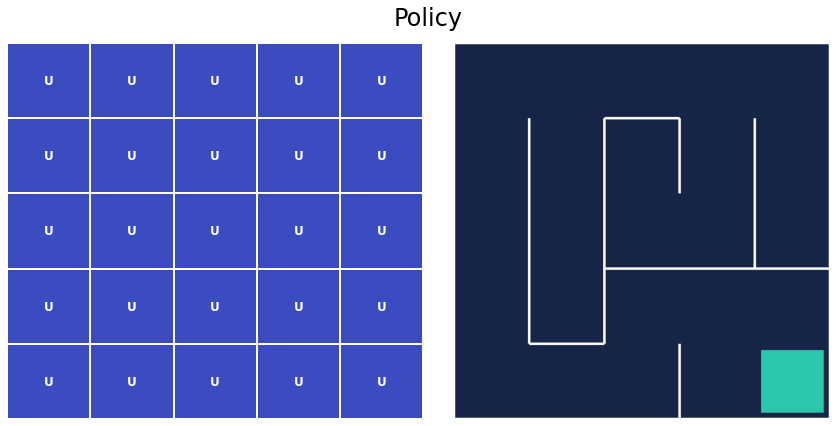

In [11]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [12]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

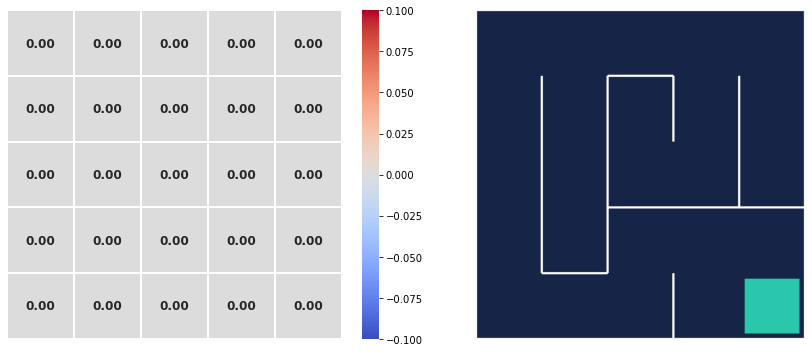

In [13]:
plot_values(state_values, frame)

## Implement the Policy Iteration algorithm

</br>

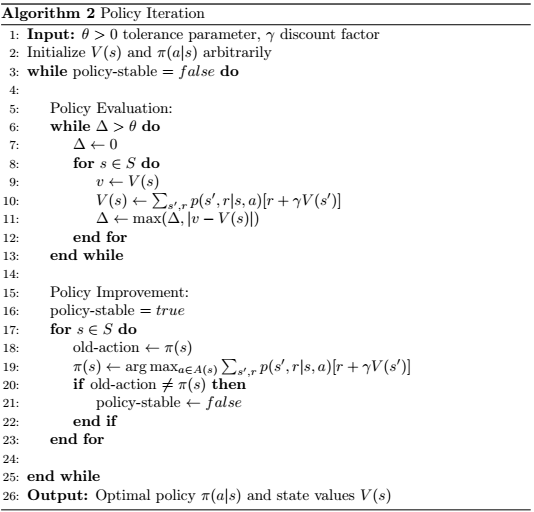

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [14]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                new_value = 0
                action_probabilities = policy_probs[(row, col)]
                
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob * (reward + gamma * state_values[next_state])
                    
                state_values[(row, col)] = new_value
                    
                delta = max(delta, abs(old_value - new_value))


In [15]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    
    policy_stable = True
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()
            
            new_action = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward + gamma * state_values[next_state]
                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action
                    
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs

            if new_action != old_action:
                policy_stable = False

    return policy_stable    

In [16]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        
        policy_evaluation(policy_probs, state_values, theta, gamma)
        
        policy_stable = policy_improvement(policy_probs, state_values, gamma)


In [17]:
policy_iteration(policy_probs, state_values)

## Show results

#### Show resulting value table $V(s)$

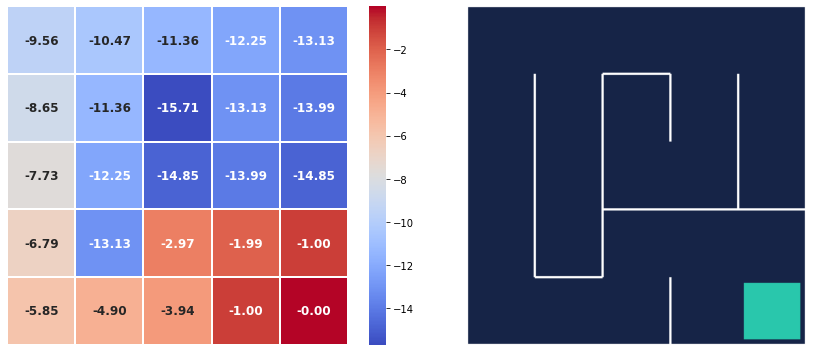

In [18]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

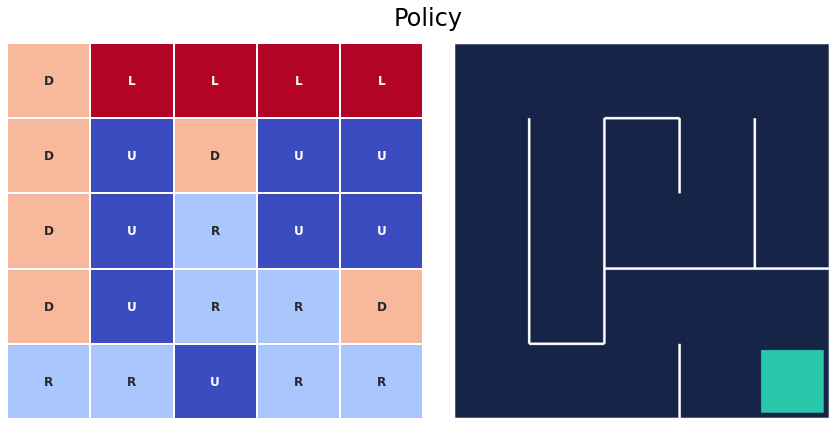

In [19]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

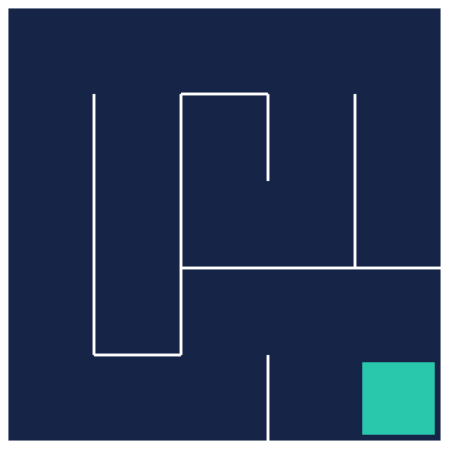

In [20]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)